In [2]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize

from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras import regularizers
from keras.layers import Dropout
from keras.optimizers import SGD


from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

#Seaborn
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [4]:
train_set = pd.read_csv ('../data/ML-CUP20-TR .csv')
train_set.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y1,Y2
count,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000
mean,-0.006309,0.020143,0.010106,0.003109,0.005619,0.023872,0.006110,-0.011253,0.007343,0.005921,48.474973,-28.571117
std,1.041026,1.045854,1.040690,1.048153,1.026938,1.054734,1.051558,1.045984,1.034932,1.057754,15.218671,10.269957
min,-2.247241,-2.158406,-2.068117,-3.190003,-2.657307,-3.467126,-2.167943,-2.435643,-2.298636,-2.325151,25.978398,-41.864859
25%,-0.987447,-0.909239,-0.907696,-0.749282,-0.920508,-0.658990,-0.983262,-0.893817,-0.939021,-0.972809,34.666957,-36.935725
50%,0.093405,0.062560,-0.023284,-0.030603,0.172423,-0.120652,0.136528,-0.005085,0.028914,0.208246,45.333403,-30.642449
75%,0.868999,0.894836,0.805138,0.695626,0.854577,0.701555,0.912320,0.783726,0.885435,0.829420,61.544593,-22.860160
max,2.289184,2.623750,2.846079,2.803400,2.250039,2.800493,2.679499,2.617978,2.526212,2.393244,78.836480,-4.064733


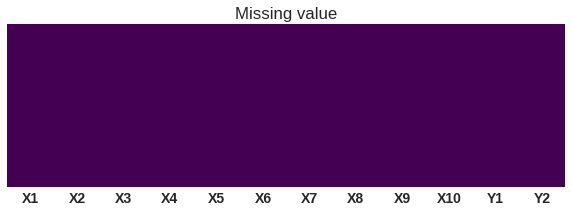

In [17]:

plt.figure(figsize=(10,3))
sns.heatmap(train_set.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value');

# Correlations and primary feature selection

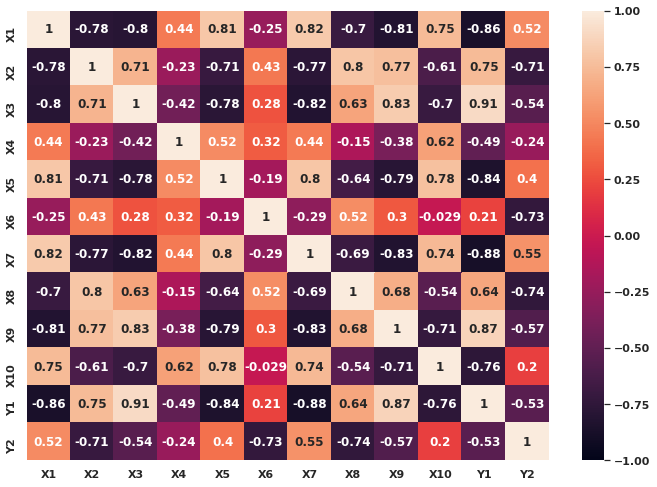

In [18]:

# correlation plot
corr = train_set.corr()
sns.color_palette("hls", 8)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, annot= True,vmin=-1, vmax=1);

# Negative Correlation
A negative (inverse) correlation occurs when the correlation coefficient is less than 0. This is an indication that both variables move in the opposite direction. In short, any reading between 0 and -1 means that the two securities move in opposite directions. When ρ is -1, the relationship is said to be perfectly negatively correlated. In short, if one variable increases, the other variable decreases with the same magnitude (and vice versa). However, the degree to which two securities are negatively correlated might vary over time (and they are almost never exactly correlated all the time).

# Positive Correlation
A positive correlation—when the correlation coefficient is greater than 0—signifies that both variables move in the same direction. When ρ is +1, it signifies that the two variables being compared have a perfect positive relationship; when one variable moves higher or lower, the other variable moves in the same direction with the same magnitude.


Some basic takeaways from the correlation matrix are as follows:
   1 all white squares indicate high correlation between the corresponding variables
   2 "X2" and "X3" show high corelation(0.71) both seem to have a similar (and relatively high) correlation with "Y1"
      and low correlation wiht "Y2" This shows a clear case of multicollinearity. Thus we can remove one of them and retain the other.
   3  "X1" and "X5" show high corelation(0.8) both seem to have a similar (and relatively high) correlation with "Y1"
      and low correlation with "Y2" This shows a clear case of multicollinearity. Thus we can remove one of them and retain the other.
   4 "X2" and "X8" show multicolinearity .Thus we can remove one of the and retain the other .
   5 "X9" and "X8"  show multicolinearity .Thus we can remove one of the and retain the other .

REMOVE X1,X2,X8

/home/anelay/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


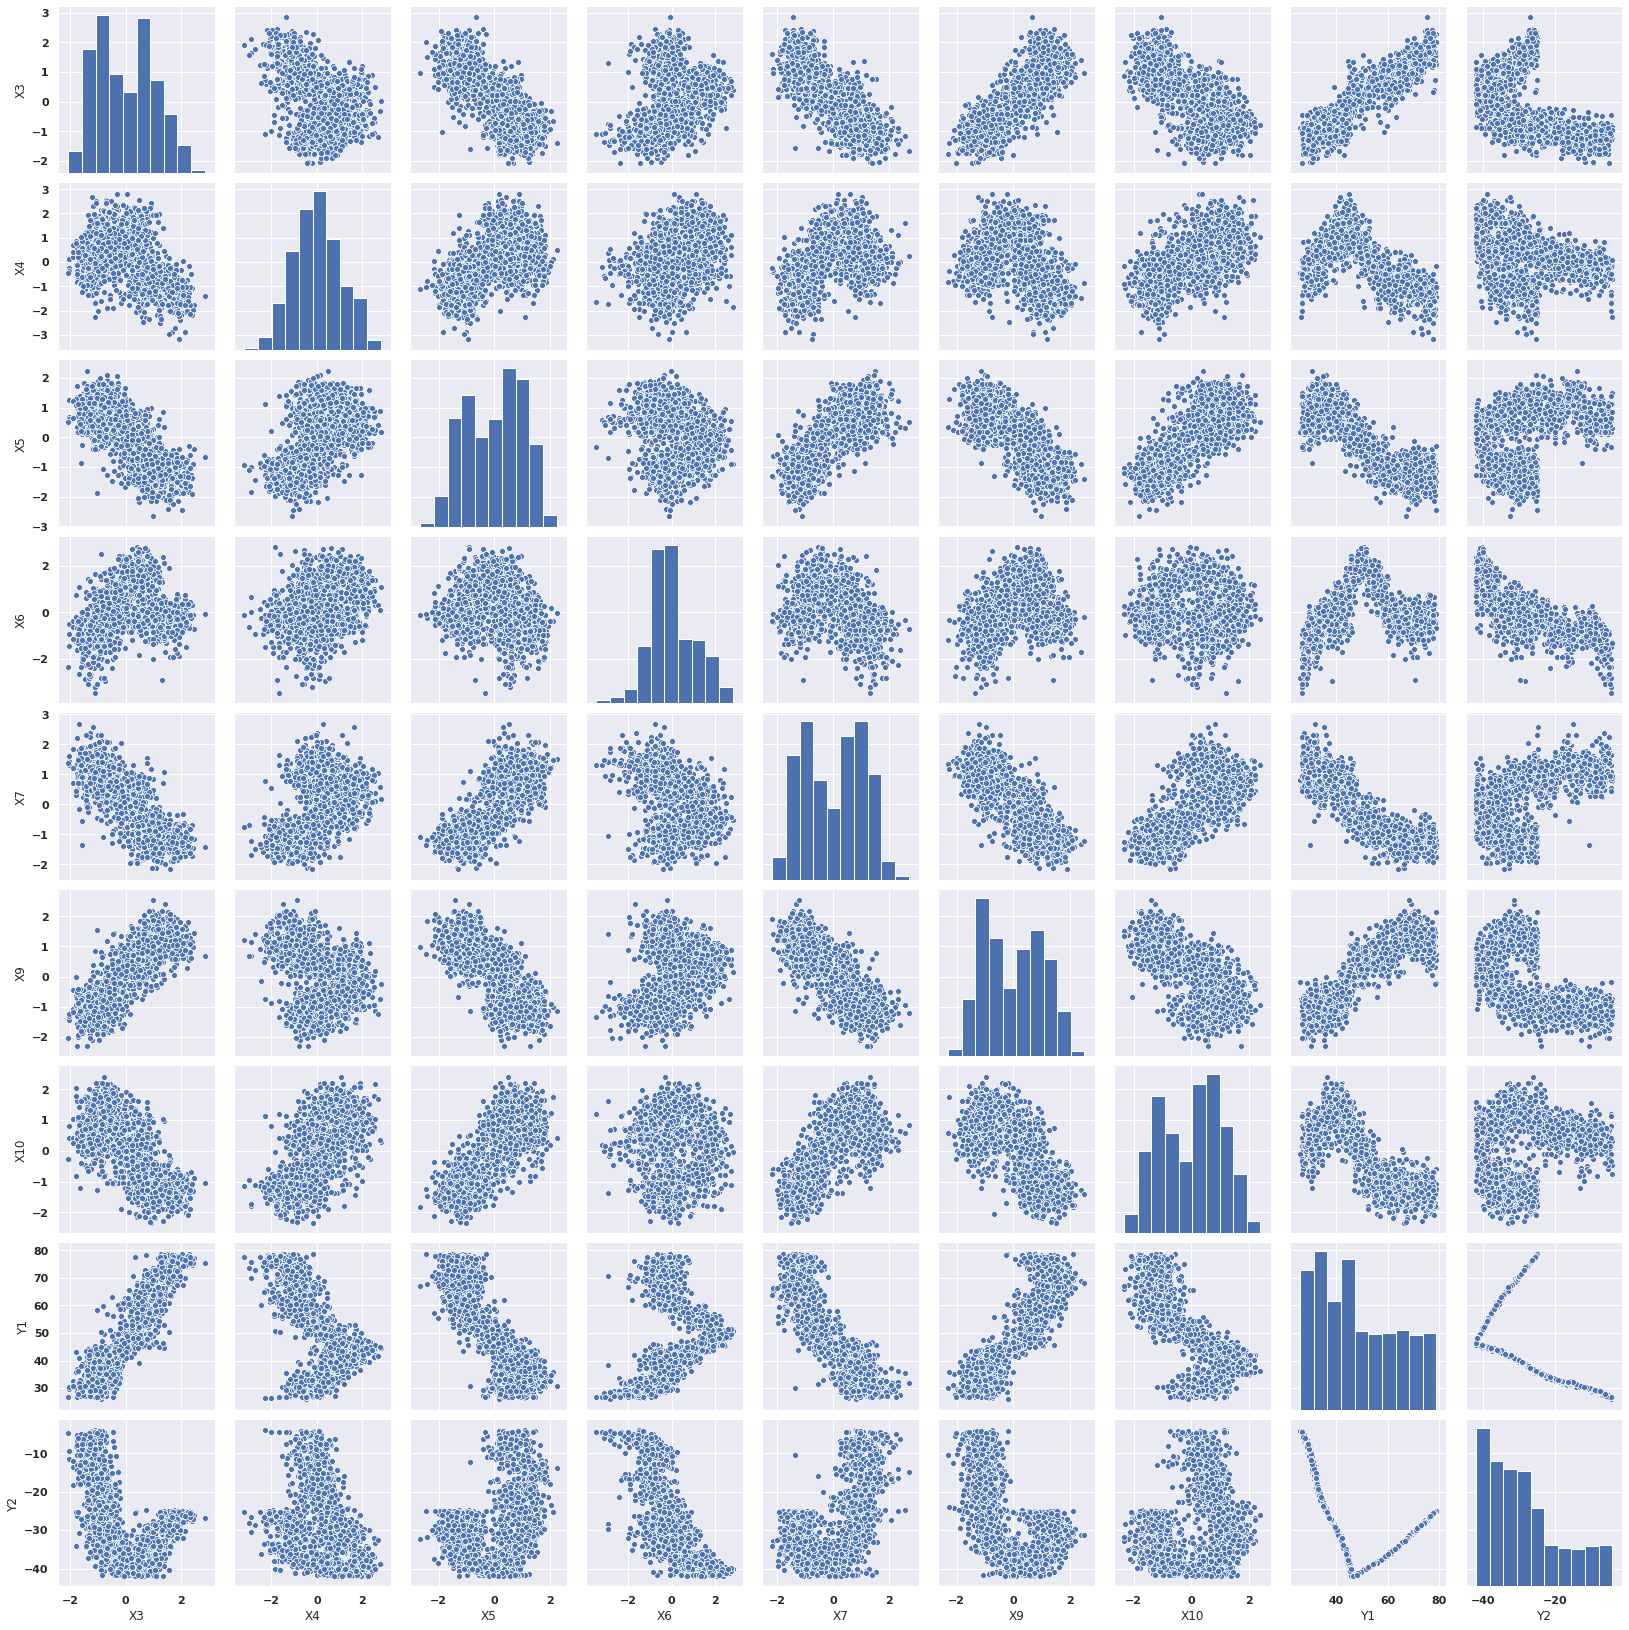

In [5]:

#scatterplot for selected columns (defined in cols)
sns.set()
cols = ['X3', 'X4', 'X5', 'X6','X7' ,'X9', 'X10', 'Y1','Y2']
sns.pairplot(train_set[cols], size = 2.5)
plt.show();

x3 has invers linear relationship with X5,X7,X10 and linear relationship with X6,X9,Y1 

# Investigation and Transformation of Target Variable

In [ ]:
In regression algorithms, it is necessary that the residuals follow a normal distribution.
residuals = y -ŷ  observed value and the predicted value (ŷ).
why  normal residuals ? check the link blow 
https://stats.stackexchange.com/questions/60410/normality-of-dependent-variable-normality-of-residuals

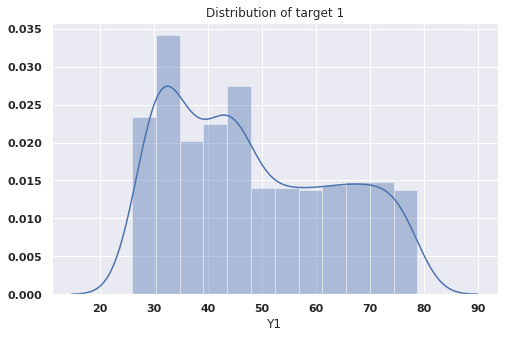

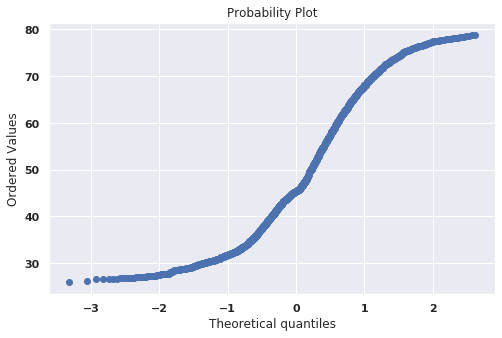

In [7]:
#distribution plot- histogram
sns.distplot(train_set['Y1']).set_title("Distribution of target 1")

# probability plot
fig = plt.figure()
res = stats.probplot(train_set['Y1'], plot=plt)

RuntimeError: The data contains non-finite values.

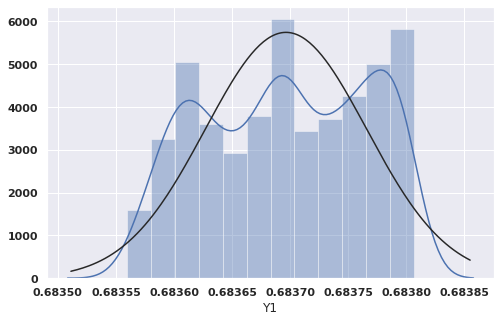

In [34]:
import warnings
warnings.filterwarnings("ignore")
# Using the log1p function applies log(1+x) to all elements of the column
train_set["Y1"] = np.log1p(train_set["Y1"])

#Check the new distribution after log transformation 
sns.distplot(train_set['Y1'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_set['Y1'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#NPlotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log target 1')


#Also the QQ plot
fig = plt.figure()
res = stats.probplot(train_set['Y1'], plot=plt)
plt.show()


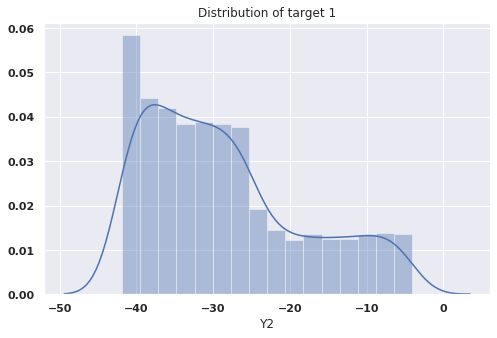

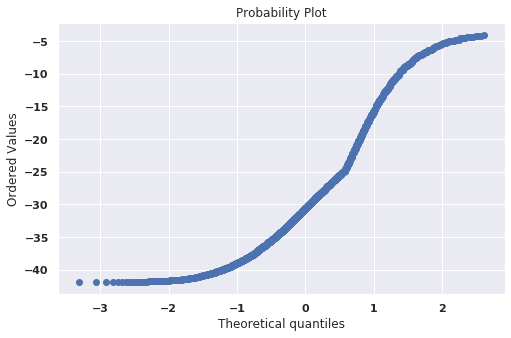

In [35]:
#distribution plot- histogram
sns.distplot(train_set['Y2']).set_title("Distribution of target 1")

# probability plot
fig = plt.figure()
res = stats.probplot(train_set['Y2'], plot=plt)

In [40]:
from sklearn.preprocessing import power_transform
train_set["Y1"] = power_transform(train_set["Y1"], method='box-cox')

ValueError: Expected 2D array, got 1D array instead:
array=[       nan        nan        nan ... 0.6837926  0.68376482 0.68375585].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

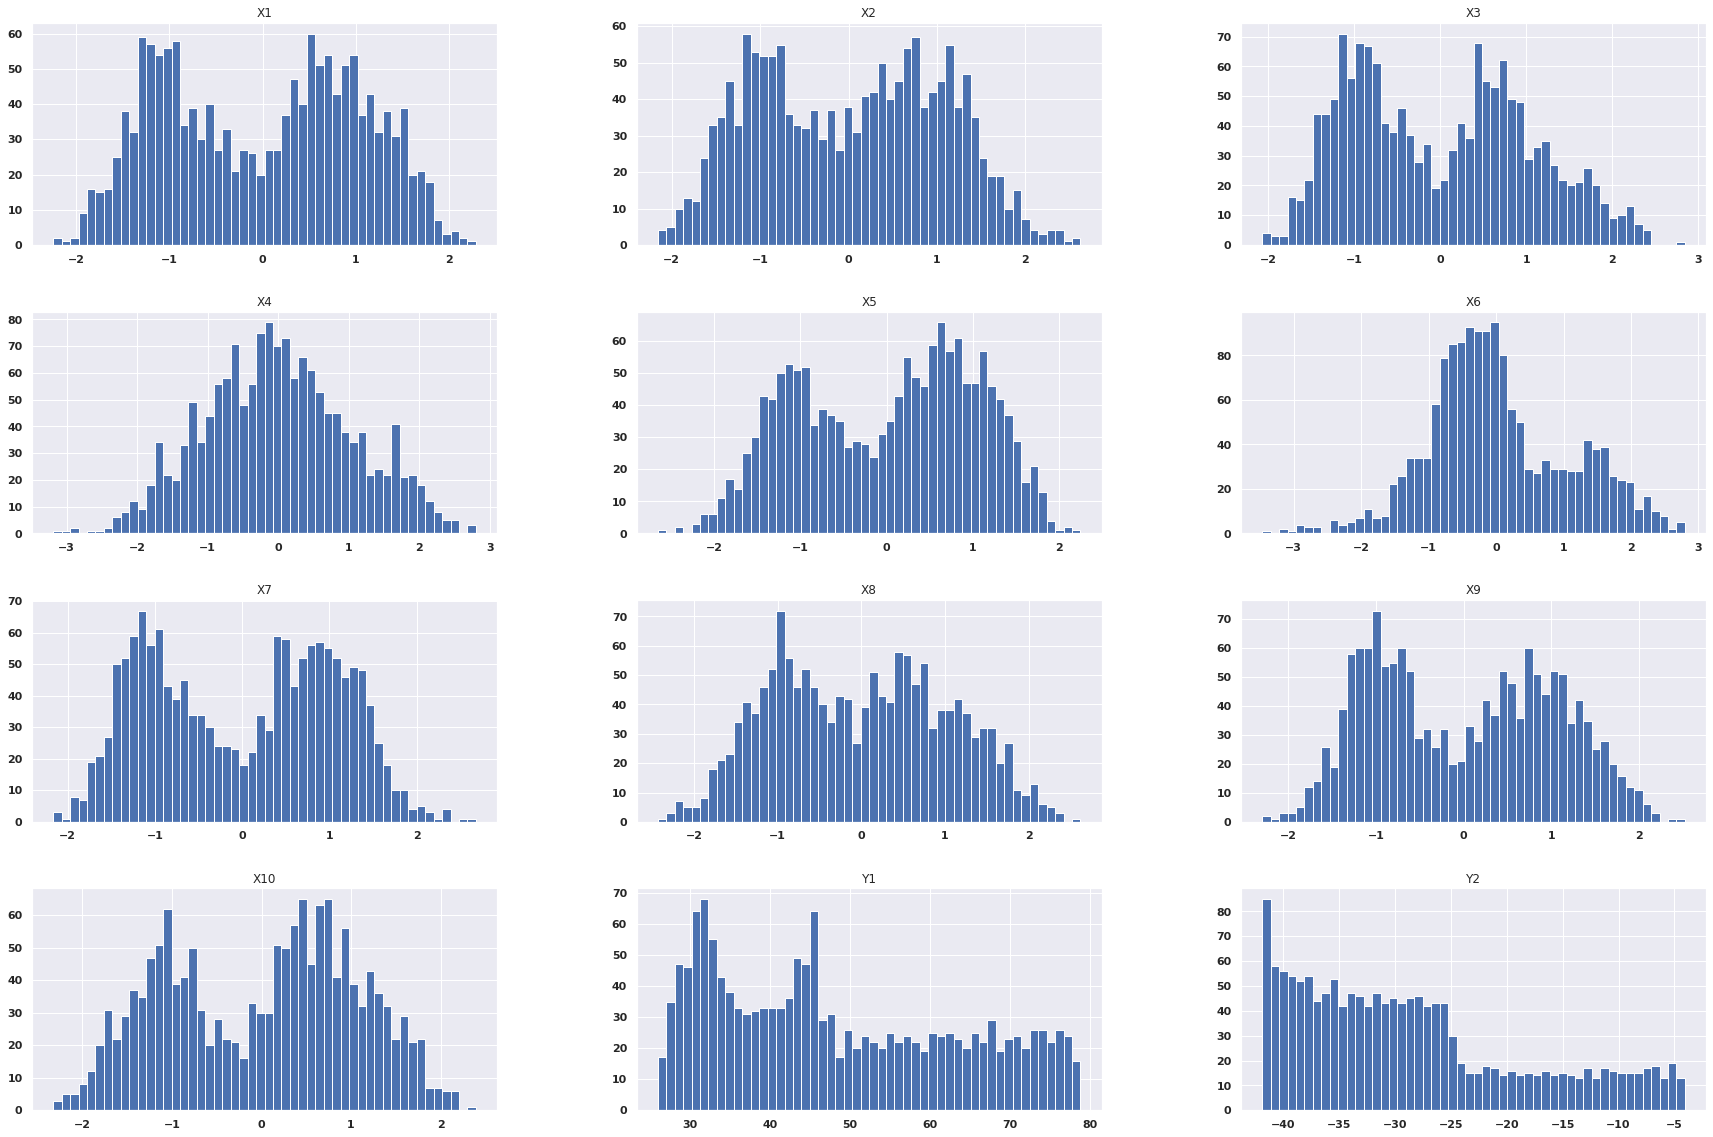

In [20]:
train_set.hist(bins=50, figsize=(30,20))
plt.show()

In [ ]:
def create_model(
                    lr=0.1, 
                    num_hidden_units=3,
                    num_hidden_units2=3,
                    activation_hidden="relu", 
                    activation_hidden2="relu", 
                    activation_out="sigmoid",
                    momentum=0.7, 
                    decay=0.01
                ):
    # create model
    model = Sequential()
    initializer = initializers.GlorotNormal(seed=1) # has the parameter of seed to produce the same random sample.
    model.add(Dense(units=num_hidden_units, kernel_initializer=initializer, input_dim=17, activation=activation_hidden))
    model.add(Dense(units = num_hidden_units2,activation = activation_hidden2))
    model.add(Dense(1, activation=activation_out)) 

    #optimizer
    sgd = SGD(lr=lr, momentum=momentum, nesterov=False)  # We can add decay to hyper parameter list to get optimum value. 

    # Compile model
    model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])
    return model